In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pitcher_data = pd.read_csv('starting_pitcher_data_pitchtype_woba_2018-2019.tsv', sep = '\t')

pitcher_data.head()

,game_pk,game_date,event_inning,top_inning_sw,pitcher,pitch_hand,player_at_bat,n_thruorder_pitcher,hit_into_play_group,is_strike,...,is_walk,api_pitch_type,fangraphs_woba_value,estimated_woba_using_speedangle,pitch_number_thisgame,alan_active_spinrate,api_p_release_spin_rate,event_description,batter_name,pitcher_name
0,529406,2018-03-29,1,Y,502042,R,605141,1.0,field_out,0,...,0.0,FF,0.0,1.701,1,1672.898220,2045.595,Mookie Betts flies out sharply to center field...,Mookie Betts,Chris Archer
1,529406,2018-03-29,1,Y,502042,R,643217,1.0,NaN,1,...,NaN,FF,NaN,NaN,2,1855.568629,2159.595,NaN,Andrew Benintendi,Chris Archer
2,529406,2018-03-29,1,Y,502042,R,643217,1.0,NaN,1,...,NaN,FF,NaN,NaN,3,1925.181992,2212.629,NaN,Andrew Benintendi,Chris Archer
3,529406,2018-03-29,1,Y,502042,R,643217,1.0,field_out,0,...,0.0,CH,0.0,0.048,4,1699.629121,1832.357,"Andrew Benintendi grounds out, second baseman ...",Andrew Benintendi,Chris Archer
4,529406,2018-03-29,1,Y,502042,R,434670,1.0,NaN,1,...,NaN,FF,NaN,NaN,5,2019.269462,2254.516,NaN,Hanley Ramirez,Chris Archer


### Drop useless columns

In [2]:
pitcher_data = pitcher_data.drop(columns = ['top_inning_sw', 'pitch_hand', 'hit_into_play_group', 'is_strike', 'is_ball', 
                  'is_strikeout', 'is_walk', 'pitch_number_thisgame', 'event_description'])

### Add spin_efficiency column (percentage)

In [3]:
pitcher_data['spin_efficiency'] = pitcher_data['alan_active_spinrate']/pitcher_data['api_p_release_spin_rate']

pitcher_data.head()

,game_pk,game_date,event_inning,pitcher,player_at_bat,n_thruorder_pitcher,api_pitch_type,fangraphs_woba_value,estimated_woba_using_speedangle,alan_active_spinrate,api_p_release_spin_rate,batter_name,pitcher_name,spin_efficiency
0,529406,2018-03-29,1,502042,605141,1.0,FF,0.0,1.701,1672.898220,2045.595,Mookie Betts,Chris Archer,0.817805
1,529406,2018-03-29,1,502042,643217,1.0,FF,NaN,NaN,1855.568629,2159.595,Andrew Benintendi,Chris Archer,0.859221
2,529406,2018-03-29,1,502042,643217,1.0,FF,NaN,NaN,1925.181992,2212.629,Andrew Benintendi,Chris Archer,0.870088
3,529406,2018-03-29,1,502042,643217,1.0,CH,0.0,0.048,1699.629121,1832.357,Andrew Benintendi,Chris Archer,0.927564
4,529406,2018-03-29,1,502042,434670,1.0,FF,NaN,NaN,2019.269462,2254.516,Hanley Ramirez,Chris Archer,0.895655


### Reorder columns

In [4]:
pitcher_data = pitcher_data[['game_pk', 'game_date', 'pitcher', 'pitcher_name', 'player_at_bat', 'batter_name', 
                             'event_inning', 'n_thruorder_pitcher', 'api_pitch_type',
                            'alan_active_spinrate', 'api_p_release_spin_rate', 'spin_efficiency', 'fangraphs_woba_value',
                            'estimated_woba_using_speedangle']]

pitcher_data.head()

,game_pk,game_date,pitcher,pitcher_name,player_at_bat,batter_name,event_inning,n_thruorder_pitcher,api_pitch_type,alan_active_spinrate,api_p_release_spin_rate,spin_efficiency,fangraphs_woba_value,estimated_woba_using_speedangle
0,529406,2018-03-29,502042,Chris Archer,605141,Mookie Betts,1,1.0,FF,1672.898220,2045.595,0.817805,0.0,1.701
1,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,FF,1855.568629,2159.595,0.859221,NaN,NaN
2,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,FF,1925.181992,2212.629,0.870088,NaN,NaN
3,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,CH,1699.629121,1832.357,0.927564,0.0,0.048
4,529406,2018-03-29,502042,Chris Archer,434670,Hanley Ramirez,1,1.0,FF,2019.269462,2254.516,0.895655,NaN,NaN


### Rename columns as necessary

In [5]:
pitcher_data = pitcher_data.rename(columns = {'pitcher': 'pitcher_id', 'player_at_bat': 'batter_id', 'event_inning': 'inning', 
                                              'n_thruorder_pitcher': 'times_thru_order','api_pitch_type': 'pitch_type', 
                                              'alan_active_spinrate': 'active_spin', 'api_p_release_spin_rate': 'raw_spin',
                                             'fangraphs_woba_value': 'woba', 'estimated_woba_using_speedangle': 'xwoba'})


In [6]:
pitcher_data['pitch_count'] = pitcher_data.groupby(['game_pk', 'pitcher_id']).cumcount() + 1

pitcher_data.head()


,game_pk,game_date,pitcher_id,pitcher_name,batter_id,batter_name,inning,times_thru_order,pitch_type,active_spin,raw_spin,spin_efficiency,woba,xwoba,pitch_count
0,529406,2018-03-29,502042,Chris Archer,605141,Mookie Betts,1,1.0,FF,1672.898220,2045.595,0.817805,0.0,1.701,1
1,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,FF,1855.568629,2159.595,0.859221,NaN,NaN,2
2,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,FF,1925.181992,2212.629,0.870088,NaN,NaN,3
3,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,CH,1699.629121,1832.357,0.927564,0.0,0.048,4
4,529406,2018-03-29,502042,Chris Archer,434670,Hanley Ramirez,1,1.0,FF,2019.269462,2254.516,0.895655,NaN,NaN,5


### Move pitch_count column

In [7]:
pitcher_data = pitcher_data[['game_pk', 'game_date', 'pitcher_id', 'pitcher_name', 'batter_id', 'batter_name', 
                             'inning', 'times_thru_order', 'pitch_count', 'pitch_type',
                            'active_spin', 'raw_spin', 'spin_efficiency', 'woba', 'xwoba']]

pitcher_data.head()

,game_pk,game_date,pitcher_id,pitcher_name,batter_id,batter_name,inning,times_thru_order,pitch_count,pitch_type,active_spin,raw_spin,spin_efficiency,woba,xwoba
0,529406,2018-03-29,502042,Chris Archer,605141,Mookie Betts,1,1.0,1,FF,1672.898220,2045.595,0.817805,0.0,1.701
1,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,2,FF,1855.568629,2159.595,0.859221,NaN,NaN
2,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,3,FF,1925.181992,2212.629,0.870088,NaN,NaN
3,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,4,CH,1699.629121,1832.357,0.927564,0.0,0.048
4,529406,2018-03-29,502042,Chris Archer,434670,Hanley Ramirez,1,1.0,5,FF,2019.269462,2254.516,0.895655,NaN,NaN


### Format spin_efficiency column as percent

In [8]:
pitcher_data['spin_efficiency_percentage'] = pitcher_data['spin_efficiency'].astype(float).map((lambda n: '{:.2%}'.format(n)))
pitcher_data = pitcher_data[['game_pk', 'game_date', 'pitcher_id', 'pitcher_name', 'batter_id', 'batter_name', 
                             'inning', 'times_thru_order', 'pitch_count', 'pitch_type',
                            'active_spin', 'raw_spin', 'spin_efficiency', 'spin_efficiency_percentage', 
                             'woba', 'xwoba']]

pitcher_data.head()

,game_pk,game_date,pitcher_id,pitcher_name,batter_id,batter_name,inning,times_thru_order,pitch_count,pitch_type,active_spin,raw_spin,spin_efficiency,spin_efficiency_percentage,woba,xwoba
0,529406,2018-03-29,502042,Chris Archer,605141,Mookie Betts,1,1.0,1,FF,1672.898220,2045.595,0.817805,81.78%,0.0,1.701
1,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,2,FF,1855.568629,2159.595,0.859221,85.92%,NaN,NaN
2,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,3,FF,1925.181992,2212.629,0.870088,87.01%,NaN,NaN
3,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,4,CH,1699.629121,1832.357,0.927564,92.76%,0.0,0.048
4,529406,2018-03-29,502042,Chris Archer,434670,Hanley Ramirez,1,1.0,5,FF,2019.269462,2254.516,0.895655,89.57%,NaN,NaN


In [9]:
pitcher_data.spin_efficiency.describe()

pitcher_data = pitcher_data[pitcher_data['spin_efficiency'] <= 1 ]

pitcher_data.spin_efficiency.describe()

count    807284.000000
mean          0.689732
std           0.240589
min           0.000818
25%           0.543391
50%           0.774211
75%           0.872493
max           0.999999
Name: spin_efficiency, dtype: float64

### Create DataFrame with Average Spin Efficiency by pitch_count

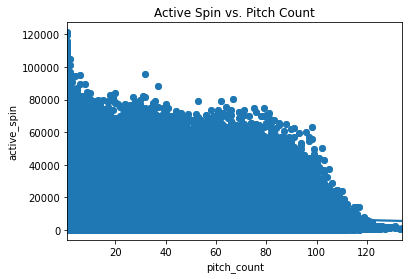

In [14]:
#pitcher_spin_ff = pitcher_data[pitcher_data['pitch_type'] == 'FF']
pitcher_spin_by_pc = pitcher_data.groupby(['pitcher_id', 'pitcher_name', 'pitch_type', 'pitch_count'], as_index = False).agg({'active_spin': sum, 'raw_spin': sum})
pitcher_spin_by_pc['spin_efficiency'] = pitcher_spin_by_pc['active_spin']/pitcher_spin_by_pc['raw_spin']

pitcher_spin_by_pc.head()

plt.scatter(x="pitch_count",y="active_spin",data=pitcher_spin_by_pc)
plt.title("Active Spin vs. Pitch Count")
plt.ylabel("Active Spin")
plt.xlabel("Pitch Count")
sns.regplot(x="pitch_count",y="active_spin",data=pitcher_spin_by_pc)
plt.show()

## Analyze wOBA against Active Spin


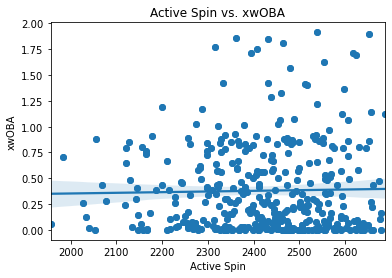

In [15]:
batter_xwoba_by_spin = pitcher_data.groupby(['pitcher_id', 'pitcher_name', 'pitch_type', 'active_spin'], 
                                           as_index = False)['xwoba'].mean()

def plot_player_xwoba(player_name, pitch_type):    
    xwoba_player_pitch = batter_xwoba_by_spin.loc[(batter_xwoba_by_spin['pitcher_name'] == player_name) & (batter_xwoba_by_spin['pitch_type'] == pitch_type)]
    plt.scatter(x="active_spin", y="xwoba", data = xwoba_player_pitch)
    plt.title("Active Spin vs. xwOBA")
    sns.regplot(x="active_spin", y="xwoba", data = xwoba_player_pitch)
    plt.xlabel("Active Spin")
    plt.ylabel("xwOBA")
    plt.show()
    
plot_player_xwoba('Justin Verlander', 'FF')
